In [2]:
import scipy.io
import numpy as np

In [3]:
mat = scipy.io.loadmat('train_znamenke.mat')
#print(mat)

A = mat['azip']
print(np.shape(A))

(256, 1707)


In [4]:
mat1 = scipy.io.loadmat('train_correct_output.mat')
#print(mat)

D = mat1['dzip']
print(np.shape(D))
niz = D[0]

(1, 1707)


In [5]:
A[:,0]

array([-1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -0.631,
        0.862, -0.167, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -0.992,  0.297,
        1.   ,  0.307, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -0.41 ,  1.   ,
        0.986, -0.565, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -1.   , -1.   , -0.683,  0.825,  1.   ,
        0.562, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -1.   , -0.938,  0.54 ,  1.   ,  0.778,
       -0.715, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -1.   ,  0.1  ,  1.   ,  0.922, -0.439,
       -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -0.257,  0.95 ,  1.   , -0.162, -1.   ,
       -1.   , -1.   , -0.987, -0.714, -0.832, -1.   , -1.   , -1.   ,
      

In [21]:
#!pip install tensorly

In [6]:
import tensorly as tl

## Slaganje tenzora

In [63]:
baze_prostora_znamenki = dict()
l = 30 

for i in range (10):
    J = [j for j, x in enumerate(niz) if x == i] #pokupili smo sve indekse koji imaju neki broj
    B = A[:,J]
    print(B.shape)
    '''U, S, V = np.linalg.svd(B)
    baze_prostora_znamenki[i] = U[:,0:30]'''
   

(256, 319)
(256, 252)
(256, 202)
(256, 131)
(256, 122)
(256, 88)
(256, 151)
(256, 166)
(256, 144)
(256, 132)


In [31]:
#ovo je NOVO !!! 
#23.2.2022.

from tensorly import fold
tensor_list = [None] * 10

#ovdje pamtimo za svaku znamenku tenzore

for i in range (10):
    J = [j for j, x in enumerate(niz) if x == i]
    B = A[:,J]
    tensor_list[i] = tl.vec_to_tensor(B,(16,16,B.shape[1]))
    #print(tensor_list[i].shape)
    '''for k in range(len(J)):
        B = A[:,J[k]] #stupac koji sadrži znamenku i sad ga samo složimo u tenzor
        two = np.reshape(B, (16,16,1))
        #s = list(tensor_list[i].shape)
        tensor_list[i] = tl.fold(tl.unfold(tensor_list[i],mode=1),two,mode=1,shape =(16,16,1))'''
        
for i in range(10):
    U, S1, V1 = np.linalg.svd(tl.unfold(tensor_list[i], 1), full_matrices=False)
    V, S2, V2 = np.linalg.svd(tl.unfold(tensor_list[i], 2), full_matrices=False)
    W, S3, V3 = np.linalg.svd(tl.unfold(tensor_list[i], 0), full_matrices=False)
    
    Sa = tl.tenalg.mode_dot(tensor_list[i],np.transpose(U),mode=1,transpose=False)
    Sb = tl.tenalg.mode_dot(Sa,np.transpose(V),mode=2,transpose=False)
    S = tl.tenalg.mode_dot(Sb,np.transpose(W),mode=0,transpose=False) #core tensor kako se spominje u članku
    
    print(S.shape)
    


(16, 16, 256)
(16, 16, 252)
(16, 16, 202)
(16, 16, 131)
(16, 16, 122)
(16, 16, 88)
(16, 16, 151)
(16, 16, 166)
(16, 16, 144)
(16, 16, 132)


In [25]:
#dims = (16,16,len(J))
#print(dims)
matrica = np.zeros((16,16))
tensor = tl.fold(matrica,mode=0,shape = (16,16))
print(type(tensor))

<class 'numpy.ndarray'>


In [43]:
'''U, S1, V1 = np.linalg.svd(tl.unfold(tensor_list[0], 1), full_matrices=False)
V, S2, V2 = np.linalg.svd(tl.unfold(tensor_list[0], 2), full_matrices=False)
W, S3, V3 = np.linalg.svd(tl.unfold(tensor_list[0], 0), full_matrices=False)
    
Sa = tl.tenalg.mode_dot(tensor_list[0],np.transpose(U),mode=1,transpose=False)
Sb = tl.tenalg.mode_dot(Sa,np.transpose(V),mode=2,transpose=False)
S = tl.tenalg.mode_dot(Sb,np.transpose(W),mode=0,transpose=False)


#pokušavamo doći do bazne matrice 

n, l, m = tensor_list[0].shape
bazna = []
for k in range(n):
    bazna_i = tl.tenalg.mode_dot(S[:,:,i],np.transpose(U),mode=1,transpose=False)
    bazna_j = tl.tenalg.mode_dot(bazna_i,np.transpose(V),mode=2,transpose=False)'''
    
    

IndexError: tuple index out of range

## Novi podaci

In [8]:
import gzip
f = gzip.open('t10k-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 5

import numpy as np
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

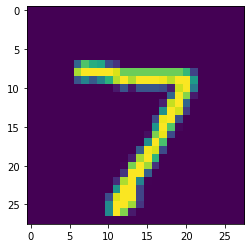

In [9]:
import matplotlib.pyplot as plt
image = np.asarray(data[0]).squeeze()
plt.imshow(image)
plt.show()